In [ ]:
!unzip Z.zip -d 'Set A'
!unzip O.zip -d 'Set B'
!unzip N.zip -d 'Set C'
!unzip F.zip -d 'Set D'
!unzip S.zip -d 'Set E'

Archive:  Z.zip
  inflating: Set A/Z092.txt          
  inflating: Set A/Z002.txt          
  inflating: Set A/Z003.txt          
  inflating: Set A/Z004.txt          
  inflating: Set A/Z005.txt          
  inflating: Set A/Z006.txt          
  inflating: Set A/Z007.txt          
  inflating: Set A/Z008.txt          
  inflating: Set A/Z009.txt          
  inflating: Set A/Z010.txt          
  inflating: Set A/Z011.txt          
  inflating: Set A/Z012.txt          
  inflating: Set A/Z013.txt          
  inflating: Set A/Z014.txt          
  inflating: Set A/Z015.txt          
  inflating: Set A/Z016.txt          
  inflating: Set A/Z017.txt          
  inflating: Set A/Z018.txt          
  inflating: Set A/Z019.txt          
  inflating: Set A/Z020.txt          
  inflating: Set A/Z021.txt          
  inflating: Set A/Z022.txt          
  inflating: Set A/Z023.txt          
  inflating: Set A/Z024.txt          
  inflating: Set A/Z025.txt          
  inflating: Set A/Z026.txt       

In [ ]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
GColab = False

if GColab:
  !pip install tqdm
  
import os
from tqdm import tqdm

DATA_DIR_A = '/content/Set A/'
DATA_DIR_B = '/content/Set B/'
DATA_DIR_C = '/content/Set C/'
DATA_DIR_D = '/content/Set D/'
DATA_DIR_E = '/content/Set E/'

  
LABEL_C1 = 0
LABEL_C2 = 1
LABEL_C3 = 2

def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([img, np.array(LABEL_C1)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_B)):
        img = np.loadtxt(DATA_DIR_B + fname)
        data.append([img, np.array(LABEL_C1)])
        nbFiles+=1    
    
    for fname in tqdm(os.listdir(DATA_DIR_C)):
        img = np.loadtxt(DATA_DIR_C + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_D)):
        img = np.loadtxt(DATA_DIR_D + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1
        
    return data


data = load_data()
print(len(data), "Files")

100%|██████████| 100/100 [00:01<00:00, 77.48it/s]

500 Files


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

X_train.shape
    
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

#num_steps = 30
batch_size = 4
nb_epoch = 20
hidden_size = 64
use_dropout=True

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))
#model.add(LSTM(64, return_sequences=False))

if use_dropout:
  model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=nb_epoch)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
80/80 [==============================] - 86s 853ms/step - loss: 0.7086 - mae: 0.4867 - acc: 0.5388 - val_loss: 0.6157 - val_mae: 0.4468 - val_acc: 0.6625
Epoch 2/20
80/80 [==============================] - 68s 845ms/step - loss: 0.660

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


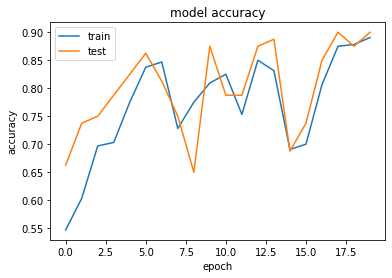

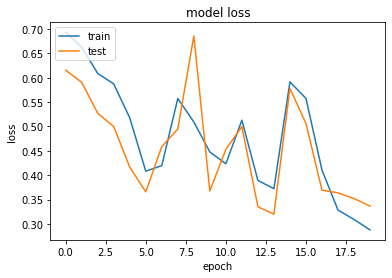

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

25/25 [==============================] - 5s 192ms/step - loss: 0.3311 - mae: 0.1965 - acc: 0.8900


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
yhat_classes = model.predict_classes(X_test, verbose=0)
yhat_probs = model.predict(X_test, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 0.890000
Precision: 0.888889
Recall: 0.933333
F1 score: 0.910569


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
import numpy as np
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (400, 4097, 1)
Test shape:  (100, 4097, 1)


In [ ]:
import tensorflow as tf
clf = tf.keras.models.Sequential()

In [ ]:
#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
clf.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
clf.add(Dropout(0.5))
#Flatten the output
clf.add(Flatten())
#Add a dense layer with 512 neurons
clf.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 1024 neurons
clf.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with two outputs
clf.add(Dense(units = 2, activation='softmax'))
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4097, 32)          192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4097, 13)          2093      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4097, 128)         8448      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2049, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2049, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 262272)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [ ]:
clf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(clf.summary())

history = clf.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=nb_epoch)
score = clf.evaluate(X_test, Y_test, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4097, 32)          192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4097, 13)          2093      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4097, 128)         8448      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2049, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2049, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 262272)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


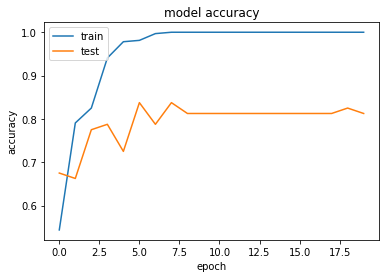

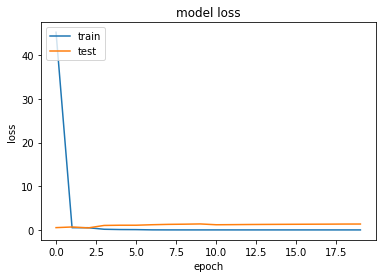

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = clf.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 283ms/step - loss: 1.6395 - mae: 0.5000 - acc: 0.8100


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
model.add(Dropout(0.5))
#Flatten the output
model.add(Flatten())
#Add a dense layer with 512 neurons
model.add(Dense(units = 16, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 1024 neurons
model.add(Dense(units = 32, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with two outputs
model.add(Dense(units = 2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 4097, 32)          192       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4097, 13)          2093      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4097, 128)         8448      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2049, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2049, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262272)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=nb_epoch)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 4097, 32)          192       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4097, 13)          2093      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4097, 128)         8448      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2049, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2049, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262272)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


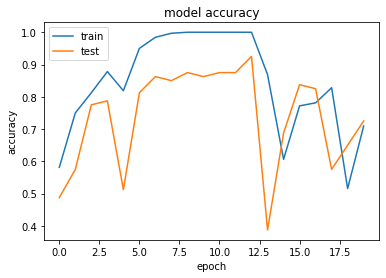

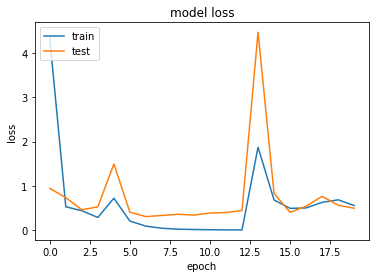

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 114ms/step - loss: 0.5484 - mae: 0.5000 - acc: 0.7200


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Flatten the output
cnn.add(Flatten())
#Add a dense layer with 512 neurons
cnn.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(Dropout(0.5))
#Add a dense layer with 1024 neurons
cnn.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(Dropout(0.5))
#Softmax as last layer with two outputs
cnn.add(Dense(units = 2, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 4097, 32)          192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2049, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2049, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 2049, 13)          2093      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1025, 13)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1025, 13)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1025, 128)        

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(cnn.summary())

history = cnn.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=nb_epoch)
score = cnn.evaluate(X_test, Y_test, batch_size=batch_size)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 4097, 32)          192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2049, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2049, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 2049, 13)          2093      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1025, 13)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1025, 13)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1025, 128)        

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


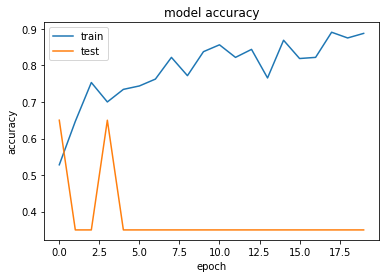

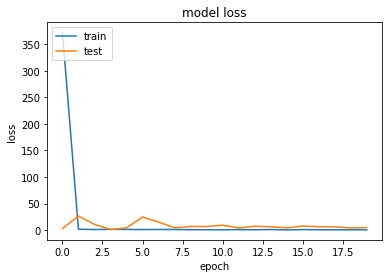

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = cnn.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 100ms/step - loss: 4.0663 - mae: 0.5000 - acc: 0.4000


In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))

In [ ]:
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mae', 'acc'])


history = ann.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=nb_epoch)
score = ann.evaluate(X_test, Y_test, batch_size=batch_size)

Epoch 1/20
80/80 [==============================] - 1s 8ms/step - loss: 14.6152 - mae: 8.3462 - acc: 0.4949 - val_loss: 13.6488 - val_mae: 9.2775 - val_acc: 0.5255
Epoch 2/20
80/80 [==============================] - 0s 6ms/step - loss: 14.6057 - mae: 7.1911 - acc: 0.4945 - val_loss: 13.6519 - val_mae: 6.3420 - val_acc: 0.5233
Epoch 3/20
80/80 [==============================] - 1s 6ms/step - loss: 14.5524 - mae: 4.2354 - acc: 0.4826 - val_loss: 13.6427 - val_mae: 4.4338 - val_acc: 0.5155
Epoch 4/20
80/80 [==============================] - 1s 6ms/step - loss: 14.5391 - mae: 3.7500 - acc: 0.4900 - val_loss: 13.6233 - val_mae: 3.9605 - val_acc: 0.5044
Epoch 5/20
80/80 [==============================] - 1s 6ms/step - loss: 13.3331 - mae: 5.5961 - acc: 0.4420 - val_loss: 8.3180 - val_mae: 11.7636 - val_acc: 0.3500
Epoch 6/20
80/80 [==============================] - 1s 6ms/step - loss: 8.3180 - mae: 10.1668 - acc: 0.4125 - val_loss: 8.3180 - val_mae: 12.0554 - val_acc: 0.3500
Epoch 7/20
80/80

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


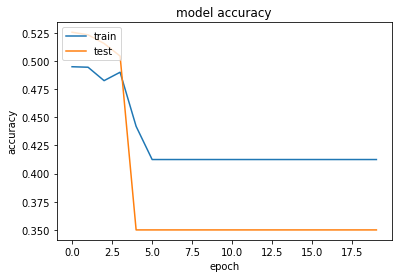

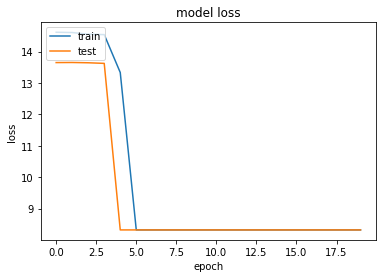

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = ann.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 11ms/step - loss: 8.3180 - mae: 10.4839 - acc: 0.4000
